<a href="https://colab.research.google.com/github/Ali-mohammadi-design/TensorFlow/blob/main/Tensorflow_CNN_Three_channels_CIFAR10_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train, y_train), (x_test, y_test)=cifar10.load_data()

170498071/170498071 [==============================] - 10s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

Note: As is clear this is 50000 images with 32 height and 32 width as well as three channels (red, blue, green)

In [5]:
x_train[0].shape

(32, 32, 3)

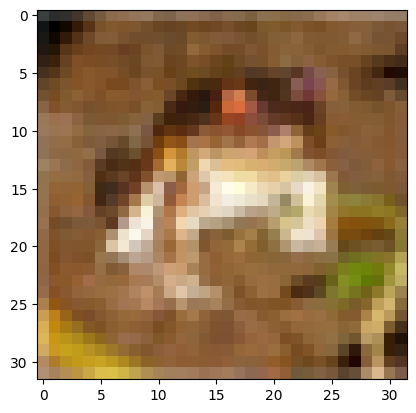

In [6]:
plt.imshow(x_train[0])

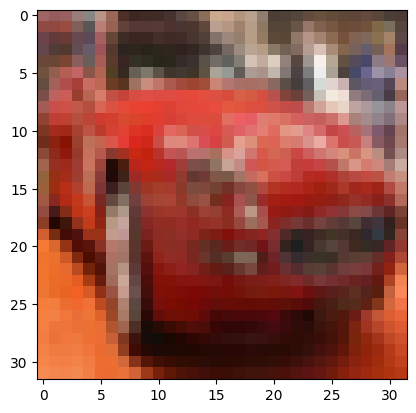

In [7]:
plt.imshow(x_train[5])

In [8]:
x_train[0].max()

255

In [9]:
x_train=x_train/255

In [12]:
x_test=x_test/255

In [14]:
x_test.shape

(10000, 32, 32, 3)

In [15]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

Note: we have to convert it to categorical values.

Note: if you search on cifar10 you can see that there is 10 categorical with different topics in this data set.

In [16]:
from keras.utils import to_categorical

In [18]:
y_cat_train=to_categorical(y_train)

In [19]:
y_cat_test=to_categorical(y_test)

In [20]:
from tensorflow.keras.models import Sequential

In [21]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [22]:
model= Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
#output layer: Note: for output lyaer, since we have a classification problem we shuold consider one neuron for each class.
model.add(Dense(10, activation='softmax'))
#note: the activation function for multiclass classification in the output layer is softmax
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'] )
#note: you can refer to https://keras.io/api/metrics/ and see all the metrics

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

In [24]:
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
early_stop=EarlyStopping(monitor='val_loss', patience=2)

In [26]:
model.fit(x_train,y_cat_train,epochs=10, validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Epoch 1/10
1563/1563 [==============================] - 67s 42ms/step - loss: 1.4848 - accuracy: 0.4635 - val_loss: 1.3000 - val_accuracy: 0.5387
Epoch 2/10
1563/1563 [==============================] - 65s 42ms/step - loss: 1.1528 - accuracy: 0.5938 - val_loss: 1.1274 - val_accuracy: 0.5993
Epoch 3/10
1563/1563 [==============================] - 65s 42ms/step - loss: 1.0074 - accuracy: 0.6448 - val_loss: 1.0458 - val_accuracy: 0.6418
Epoch 4/10
1563/1563 [==============================] - 65s 41ms/step - loss: 0.9038 - accuracy: 0.6838 - val_loss: 1.0461 - val_accuracy: 0.6362
Epoch 5/10
1563/1563 [==============================] - 65s 41ms/step - loss: 0.8213 - accuracy: 0.7118 - val_loss: 0.9852 - val_accuracy: 0.6552
Epoch 6/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7377 - accuracy: 0.7424 - val_loss: 1.0186 - val_accuracy: 0.6570
Epoch 7/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.6641 - accuracy: 0.7696 - val_loss: 0.9900 -

In [29]:
metrics=pd.DataFrame(model.history.history)

In [30]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.484806,0.46350,1.300046,0.5387
1,1.152793,0.59382,1.127445,0.5993
2,1.007414,0.64480,1.045833,0.6418
3,0.903795,0.68380,1.046085,0.6362
4,0.821250,0.71178,0.985165,0.6552
5,0.737660,0.74244,1.018586,0.6570
6,0.664101,0.76956,0.989984,0.6778


In [31]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

<Axes: >

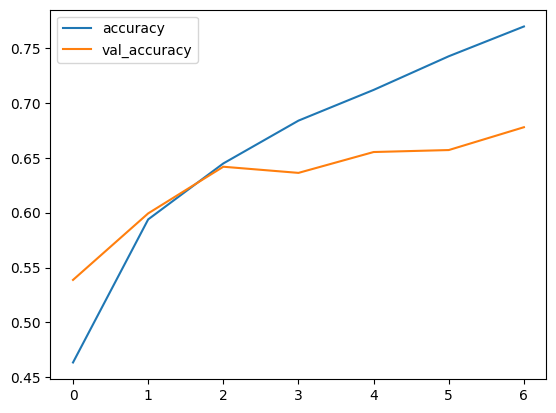

In [34]:
metrics[['accuracy','val_accuracy']].plot()

<Axes: >

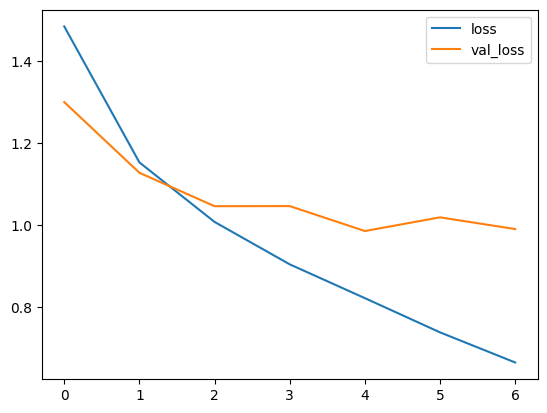

In [35]:
metrics[['loss','val_loss']].plot()

In [36]:

from sklearn.metrics import classification_report, confusion_matrix

In [83]:
predictions = (model.predict(x_test) > 0.5).astype("int32")

313/313 [==============================] - 3s 10ms/step


In [84]:
print(classification_report(y_cat_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.66      0.72      1000
           1       0.85      0.76      0.80      1000
           2       0.73      0.46      0.56      1000
           3       0.56      0.41      0.47      1000
           4       0.71      0.55      0.62      1000
           5       0.70      0.43      0.53      1000
           6       0.86      0.66      0.75      1000
           7       0.67      0.77      0.72      1000
           8       0.79      0.78      0.78      1000
           9       0.76      0.75      0.76      1000

   micro avg       0.75      0.62      0.68     10000
   macro avg       0.74      0.62      0.67     10000
weighted avg       0.74      0.62      0.67     10000
 samples avg       0.62      0.62      0.62     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Note: The avg precision is 70 percent is it good?

If we are going to randomly guess the type of the picture we would have 10 percent accuarcy. Beacuase we have ten types and we choose 1 out of ten. Thus 70 percent accuracy could be accounted acceptable!

Note: As is clear in the table. Class number 3 has not good accuracy! The machine is not capable to recognize the cats accueartely!

Note: we have trained the model to generate multi categorical output. However, we cannot use this output to generate confusion matrix. therefore we would use argmax() to recognize the index number of the data and convert it to the number.

In [86]:
predictions_converted_back = np.argmax(predictions, axis=1)

In [88]:
confusion_matrix(y_test,predictions_converted_back)

array([[790,  16,  23,   8,  12,   3,   4,  12,  94,  38],
       [ 89, 756,   2,   5,   1,   0,   5,   7,  37,  98],
       [285,   3, 456,  36,  69,  29,  39,  58,  13,  12],
       [285,   9,  35, 405,  42, 100,  21,  73,  13,  17],
       [236,   2,  30,  33, 552,  14,  30,  90,   9,   4],
       [281,   1,  29, 122,  27, 429,   8,  89,   6,   8],
       [156,   7,  30,  66,  37,  10, 662,  13,   8,  11],
       [111,   1,  12,  27,  35,  22,   1, 771,   2,  18],
       [126,  27,   4,  10,   5,   3,   3,   9, 779,  34],
       [110,  70,   3,   7,   0,   6,   0,  21,  30, 753]])

<Axes: >

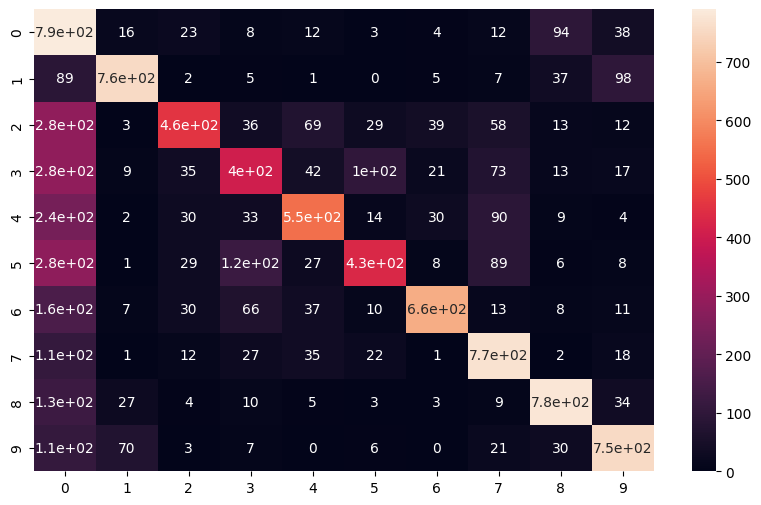

In [92]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions_converted_back), annot=True)

Note: As is clear 120 ones of the category 3 was wrongly recognized as category 5 (which is dogs).

In [66]:
my_test=x_test[5]

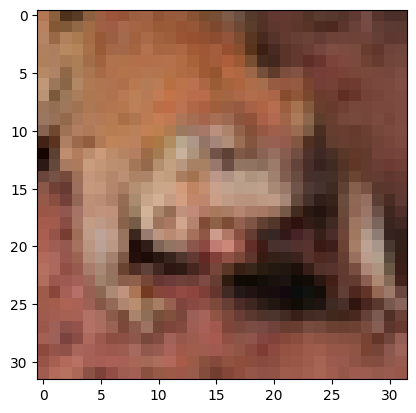

In [67]:
plt.imshow(my_test)

In [68]:
y_test[5]

array([6], dtype=uint8)

In [69]:
prediction = (model.predict(my_test.reshape(1,32,32,3)) > 0.5).astype("int32")

1/1 [==============================] - 0s 41ms/step


In [70]:
prediction

array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]], dtype=int32)